# Table of Contents

- Gathering
- Assessing
- Cleaning
- Analyzing and Visualizations



# 1- Gathering the data

## Importing Librairies

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import sys
import os 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Importing enhanced twitter archive

In [2]:
t_archive = pd.read_csv(r'C:\Users\ElMehdi\Downloads\t_archive.csv')
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Downloading the tweet image prediction


In [3]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Getting tweet data from twitter API

In [7]:
# Using the twitter API to get the json file for each tweet made by WeRateDogs.

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_id = df_1.tweet_id.values
len(tweet_id)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) 

NameError: name 'df_1' is not defined

In [27]:
# converting the txt file to data list where each element (line) contains one place of tweet info
#download data from twitter API 
tweet_status = pd.read_json(r'C:\Users\ElMehdi\Downloads\Udacity_Wrangle_Data_project\tweet-json\tweet-json', lines = True,encoding='utf-8') 

# 2 - Assessing the data

In [28]:
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [29]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [30]:
tweet_status

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [31]:
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
 t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
t_archive[t_archive['rating_denominator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [34]:
t_archive['text'][t_archive['rating_denominator'] == 0 ]

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [35]:
# delete this row.
t_archive[t_archive['rating_denominator'] < 10 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [36]:
t_archive[t_archive['rating_denominator'] > 20 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [37]:
t_archive[t_archive['rating_numerator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [38]:
len(t_archive[t_archive['rating_numerator'] == 0 ])

2

In [39]:
t_archive[t_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [40]:
len(t_archive[t_archive['rating_numerator'] > 20 ])

24

In [41]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [43]:
tweet_status.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [44]:
[t_archive.duplicated() == False] 

[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 2351    True
 2352    True
 2353    True
 2354    True
 2355    True
 Length: 2356, dtype: bool]

In [45]:
[image_prediction.duplicated() == False] 

[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 2070    True
 2071    True
 2072    True
 2073    True
 2074    True
 Length: 2075, dtype: bool]

In [46]:
[tweet_status.id.duplicated() == False] 

[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 2349    True
 2350    True
 2351    True
 2352    True
 2353    True
 Name: id, Length: 2354, dtype: bool]

In [47]:
image_prediction.p1.value_counts() 

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
water_bottle            1
beaver                  1
studio_couch            1
coil                    1
mortarboard             1
Name: p1, Length: 378, dtype: int64

In [48]:
rare_things= image_prediction.groupby('p1').filter(lambda x: len(x) < 3)

In [49]:
rare_things.sample(5) 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [50]:
len(rare_things) 

271

In [51]:
len(image_prediction) 

2075

In [52]:
tweet_status['id'].sample(5) 

1024    746131877086527488
1254    710588934686908417
659     791312159183634433
1742    679158373988876288
1567    687807801670897665
Name: id, dtype: int64

In [53]:
t_archive[t_archive.tweet_id == 782722598790725632] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
725,782722598790725632,NaN,NaN,2016-10-02 23:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She fought a bee and the bee wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782722598...,10,10,Penny,None,None,None,None


In [54]:
tweet_status[tweet_status.id == 782722598790725632] 

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
724,2016-10-02 23:23:04+00:00,782722598790725632,782722598790725632,This is Penny. She fought a bee and the bee wo...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 782722587017285632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,19250,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [55]:
# Merging the 3 data frames : 
df1 = tweet_status.filter(['id','created_at'])
df1 = df1.rename(columns={'id': 'tweet_id'})
df2 = t_archive.filter(['tweet_id', 'timestamp'])

dfmerged = pd.merge(df1, df2, how='inner', on=['tweet_id'])

In [56]:
dfmerged.sample(5)

,tweet_id,created_at,timestamp
1216,714957620017307648,2016-03-29 23:29:14+00:00,2016-03-29 23:29:14 +0000
22,887473957103951883,2017-07-19 00:47:34+00:00,2017-07-19 00:47:34 +0000
163,860184849394610176,2017-05-04 17:30:24+00:00,2017-05-04 17:30:24 +0000
1538,689659372465688576,2016-01-20 04:03:02+00:00,2016-01-20 04:03:02 +0000
1202,716080869887381504,2016-04-02 01:52:38+00:00,2016-04-02 01:52:38 +0000


# Assessment report
### Tidiness Issues

T_archive

- Columns 'doggo', 'floofer', 'pupper', 'puppo' in t_archive should be a single column stage
- Change tweet_id to type int64 in order to merge with the other 2 tables

Tweet_status

- Join 'tweet_json' and 'image_prediction' to 't_archive'

### Quality Issues

T_archive

- Delete columns that won't be used for analysis
- The datatype of "timestamp" is not correct.
- The standard for "rating_denominator" is 10 correct the same.
- The "rating_numerator" also has some incorrect values.
- The dog names format should be consistent. Make the first letter capital for all the names.

Image Prediction

- Drop duplicate values from jpg_url
- The column names such as p1,p2 are not decriptive.
- The prediction dog breeds involve both uppercase and lowercase for the first letter.

Tweet_status

- Delete columns that won't be used for analysis







# 3 - Data Cleaning

In [58]:
# Reading gathered files
t_archive = pd.read_csv(r'C:\Users\ElMehdi\Downloads\t_archive.csv')
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
tweet_status = pd.read_json(r'C:\Users\ElMehdi\Downloads\Udacity_Wrangle_Data_project\tweet-json\tweet-json', lines = True,encoding='utf-8') 

In [59]:
# create a cleaned dataframe from the archive
cleaned_arch = t_archive.copy()

In [60]:
# test
cleaned_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [61]:
# let's exclude all the retweets
cleaned_arch = cleaned_arch[cleaned_arch['in_reply_to_status_id'].isnull()]

In [62]:
cleaned_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [63]:
# Dropping unneded columns using drop function
cleaned_arch = cleaned_arch.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [64]:
cleaned_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   expanded_urls       2274 non-null   object
 5   rating_numerator    2278 non-null   int64 
 6   rating_denominator  2278 non-null   int64 
 7   name                2278 non-null   object
 8   doggo               2278 non-null   object
 9   floofer             2278 non-null   object
 10  pupper              2278 non-null   object
 11  puppo               2278 non-null   object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


In [65]:
cleaned_arch = cleaned_arch.drop(['expanded_urls'], axis=1)

In [66]:
cleaned_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   rating_numerator    2278 non-null   int64 
 5   rating_denominator  2278 non-null   int64 
 6   name                2278 non-null   object
 7   doggo               2278 non-null   object
 8   floofer             2278 non-null   object
 9   pupper              2278 non-null   object
 10  puppo               2278 non-null   object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


In [67]:
# using loc to correct the typo mistakes in specified cells

cleaned_arch.loc[cleaned_arch['rating_numerator']==50, ['rating_numerator']] = 10
cleaned_arch.loc[cleaned_arch['rating_denominator']==50, ['rating_denominator']] = 10

cleaned_arch.loc[cleaned_arch['rating_numerator']==88, ['rating_numerator']] = 11
cleaned_arch.loc[cleaned_arch['rating_denominator']==80, ['rating_denominator']] = 10

cleaned_arch.loc[cleaned_arch['rating_numerator']==80, ['rating_numerator']] = 10
cleaned_arch.loc[cleaned_arch['rating_denominator']==80, ['rating_denominator']] = 10

cleaned_arch.loc[cleaned_arch['rating_numerator']==44, ['rating_numerator']] = 11
cleaned_arch.loc[cleaned_arch['rating_denominator']==40, ['rating_denominator']] = 10

In [68]:
len(cleaned_arch[cleaned_arch['rating_numerator'] > 20 ])

15

In [69]:
# let's exclude all extreme and zero values from the numertor and denominator

cleaned_arch = cleaned_arch[cleaned_arch['rating_numerator'] != 0 ]
cleaned_arch = cleaned_arch[cleaned_arch['rating_denominator'] >= 10 ]
cleaned_arch = cleaned_arch[cleaned_arch['rating_numerator'] <= 20 ]
cleaned_arch = cleaned_arch[cleaned_arch['rating_denominator'] < 20 ]

In [70]:
len(cleaned_arch[cleaned_arch['rating_numerator'] > 20 ])

0

In [71]:
len(cleaned_arch[cleaned_arch['rating_denominator'] < 10 ])

0

In [72]:
len(cleaned_arch[cleaned_arch['rating_denominator'] > 20 ])

0

In [73]:
# merge the column doggo, floofer, pupper or poppo to column_class
cleaned_arch['column_class'] = cleaned_arch[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [74]:
# drop the doggo, floofer, pupper and puppo columns
cleaned_arch.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [75]:
cleaned_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2260 non-null   int64 
 1   timestamp           2260 non-null   object
 2   source              2260 non-null   object
 3   text                2260 non-null   object
 4   rating_numerator    2260 non-null   int64 
 5   rating_denominator  2260 non-null   int64 
 6   name                2260 non-null   object
 7   column_class        2260 non-null   object
dtypes: int64(3), object(5)
memory usage: 158.9+ KB


In [76]:
cleaned_images = image_prediction.copy()

In [77]:
cleaned_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
# renaming columns 
cleaned_images= cleaned_images.rename(columns={'p1':'Breed_probability1', 'p2':'Breed_probability2', 'p3':'Breed_probability3'})

In [79]:
cleaned_images.sample(5)

,tweet_id,jpg_url,img_num,Breed_probability1,p1_conf,p1_dog,Breed_probability2,p2_conf,p2_dog,Breed_probability3,p3_conf,p3_dog
858,696886256886657024,https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg,1,kuvasz,0.383941,True,golden_retriever,0.289085,True,dingo,0.056548,False
1727,820446719150292993,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False
1359,760893934457552897,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True


In [80]:
# Exclude all rows with P1_confidence less than 0.5

cleaned_images = cleaned_images[cleaned_images['p1_conf'] > 0.5 ]

In [81]:
# filtering to select only needed columns

cleaned_images = cleaned_images.filter(['tweet_id','Breed_probability1','p1_conf'] )

In [82]:
cleaned_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1 to 2072
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1239 non-null   int64  
 1   Breed_probability1  1239 non-null   object 
 2   p1_conf             1239 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.7+ KB


In [83]:
cleaned_status = tweet_status.copy()

In [84]:
cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [85]:
# rename the column id 
cleaned_status = cleaned_status.rename(columns={'id':'tweet_id'})

In [86]:
cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [87]:
# filter/select needed columns
cleaned_status = cleaned_status.filter(['tweet_id','favorite_count','retweet_count', 'source', 'user'] )

cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   source          2354 non-null   object
 4   user            2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


## Merging documents to form a working dataframe


In [88]:
tweet_df = pd.merge(cleaned_arch, cleaned_images, how='outer', on=['tweet_id'])

In [89]:
tweet_df = pd.merge(tweet_df, cleaned_status, how = 'outer', on=['tweet_id'])

In [90]:
tweet_df.sample(5)

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,column_class,Breed_probability1,p1_conf,favorite_count,retweet_count,source_y,user
462,813910438903693312,2016-12-28 00:52:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,11.0,10.0,Chubbs,doggo,Siberian_husky,0.699355,10342.0,2194.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1722,677228873407442944,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,11.0,10.0,Chuq,None,common_iguana,0.566338,3837.0,1840.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1779,675497103322386432,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,11.0,10.0,Reggie,None,vizsla,0.519589,3397.0,1443.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
963,747648653817413632,2016-06-28 04:31:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Keurig. He apparently headbutts other ...,12.0,10.0,Keurig,None,NaN,NaN,14182.0,6614.0,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1460,690400367696297985,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,10.0,10.0,Eriq,None,NaN,NaN,2041.0,509.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [91]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2260 non-null   object 
 2   source_x            2260 non-null   object 
 3   text                2260 non-null   object 
 4   rating_numerator    2260 non-null   float64
 5   rating_denominator  2260 non-null   float64
 6   name                2260 non-null   object 
 7   column_class        2260 non-null   object 
 8   Breed_probability1  1239 non-null   object 
 9   p1_conf             1239 non-null   float64
 10  favorite_count      2354 non-null   float64
 11  retweet_count       2354 non-null   float64
 12  source_y            2354 non-null   object 
 13  user                2354 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 276.1+ KB


In [92]:
# Saving df as csv
tweet_df.to_csv('twitter_archive_master.csv')

# 4 - Analyze and visualizing

In [93]:
# Most used twitter ressources
tweet_df['source_x'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2126
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source_x, dtype: int64

In [94]:
tweet_df['rating_numerator'].value_counts().sort_index()

1.0       5
2.0       9
3.0      19
4.0      15
5.0      35
6.0      32
7.0      53
8.0     102
9.0     155
10.0    457
11.0    453
12.0    544
13.0    331
14.0     49
15.0      1
Name: rating_numerator, dtype: int64

### Analysis of rating of dogs

In [95]:
tweet_df['rating_numerator'][tweet_df['rating_numerator'] > 10].value_counts().sum()

1378

In [96]:
# Analysis of retweet and favorite counts

print('%s\t%s' % ('Mean Retweet Count', round(tweet_df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(tweet_df.favorite_count.mean())))

Mean Retweet Count	3165
Mean Favorite Count	8081


In [97]:
# When the dog is rated greater than 10

print('%s\t%s' % ('Mean Retweet Count', 
                  round(tweet_df.retweet_count[tweet_df.rating_numerator > 10].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(tweet_df.favorite_count[tweet_df.rating_numerator > 10].mean()))) 

Mean Retweet Count	4424
Mean Favorite Count	11435


In [98]:
# When the dog has a name

print('%s\t%s' % ('Mean Retweet Count', 
                  round(tweet_df.retweet_count[tweet_df.name != 'None'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(tweet_df.favorite_count[tweet_df.name != 'None'].mean())))

Mean Retweet Count	3012
Mean Favorite Count	8190


In [99]:
# Categorized on dog-class

print('Doggo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(tweet_df.retweet_count[tweet_df.column_class  == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(tweet_df.favorite_count[tweet_df.column_class  == 'doggo'].mean())))

print('Floofer')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(tweet_df.retweet_count[tweet_df.column_class  == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(tweet_df.favorite_count[tweet_df.column_class  == 'floofer'].mean())))

print('Pupper')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(tweet_df.retweet_count[tweet_df.column_class  == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(tweet_df.favorite_count[tweet_df.column_class  == 'pupper'].mean())))

print('Puppo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(tweet_df.retweet_count[tweet_df.column_class == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(tweet_df.favorite_count[tweet_df.column_class  == 'puppo'].mean())))

Doggo
Mean Retweet Count	7800
Mean Favorite Count	16254
Floofer
Mean Retweet Count	4084
Mean Favorite Count	11675
Pupper
Mean Retweet Count	3023
Mean Favorite Count	6807
Puppo
Mean Retweet Count	6802
Mean Favorite Count	18799


In [100]:
tweet_df.name.value_counts()

None       658
a           54
Charlie     12
Cooper      11
Oliver      11
          ... 
Tayzie       1
Edmund       1
Kenzie       1
Jerome       1
Timofy       1
Name: name, Length: 954, dtype: int64

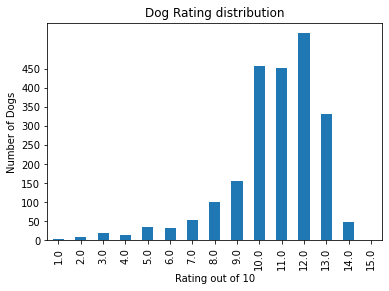

In [101]:
ax = tweet_df.rating_numerator.value_counts().sort_index().plot(kind='bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

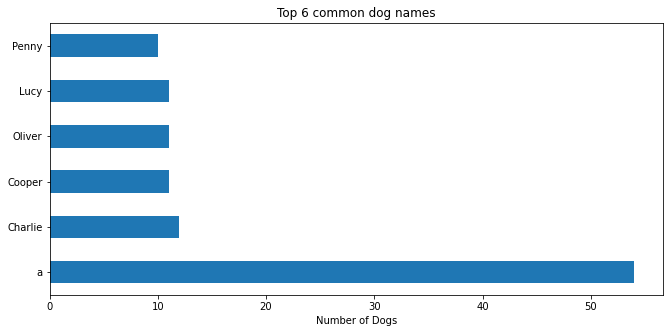

In [102]:
tweet_df.name.value_counts()[1:7].plot(kind='barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')